In [1]:
import pandas as pd

## Énoncé
Après avoir regardé le dernier reportage d'un magasine d'investigation sur l'industrie pharmaceutique, vous vous posez dorénavant beaucoup de questions. Afin de vous faire votre propre opinion de ce vaste monde vous avez pris l'initiative d'enquêter avec vos compétences en data science. Après un rapide tour d'horizon des données à disposition, vous vous tournez une fois de plus vers l'open data.

## Mission
L'Agence nationale de sécurité du médicament et la haute autorité de santé mettent à disposition en open data plusieurs fichiers référençant les médicaments disponibles sur le territoire français. Sont disponibles des informations comme la dénomination du médicament, la forme pharmaceutique, le statut de la mise sur le marché, le prix, le taux de remboursement, les substances actives et bien d'autres !

Il est donc tant de partir enquêter, **il faut d'abord se familiariser avec les données, nettoyer puis analyser !**

# Exercice
## Partie 1 - Analyse des mises sur le marché (50 minutes)
### 1 - Chargement des données
<img src='./oc2.png' width=15px /> Téléchargez le fichier des spécialités `CIS_bdpm.txt` disponible [ici](http://base-donnees-publique.medicaments.gouv.fr/telechargement.php?fichier=CIS_bdpm.txt) puis chargez le à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df_spe`.

Comme indiqué dans [la documentation des données](http://base-donnees-publique.medicaments.gouv.fr/docs/Contenu_et_format_des_fichiers_telechargeables_dans_la_BDM_v1.pdf), les colonnes du fichier sont uniquement séparées par des tabulations.

**Petit coup de pouce pour démarrer**, pour chacune des conditions suivantes, trouvez le paramètre de la fonction `read_csv` adapté :
- les colonnes sont séparées par des tabulations
- il n'y a pas de header (ligne contenant le nom des colonnes)
- l'encodage à utiliser est *iso-8859-1*

In [2]:
df_spe = pd.read_csv('data/CIS_bdpm.txt', header=None, sep='\t', encoding='iso-8859-1')

<img src='./oc2.png' width=15px /> Pouvez-vous afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées ?

In [3]:
df_spe.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,61266250,"A 313 200 000 UI POUR CENT, pommade",pommade,cutanée,Autorisation active,Procédure nationale,Commercialisée,12/03/1998,NaN,NaN,PHARMA DEVELOPPEMENT,Non
1,62869109,"A 313 50 000 U.I., capsule molle",capsule molle,orale,Autorisation active,Procédure nationale,Commercialisée,07/07/1997,NaN,NaN,PHARMA DEVELOPPEMENT,Non
2,62401060,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,21/02/2018,NaN,NaN,MYLAN SAS,Non
3,63797011,"ABACAVIR SANDOZ 300 mg, comprimé pelliculé séc...",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,30/12/2016,NaN,NaN,SANDOZ,Non
4,62828870,"ABACAVIR/LAMIVUDINE ARROW 600 mg/300 mg, compr...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,15/12/2017,NaN,NaN,ARROW GENERIQUES,Non


C'est une façon très simple de vérifier que des données sont correctement chargées, il ne faut jamais s'en priver. 

On voit d'ailleurs ici que le nom des colonnes est absent, il faut corriger cela en utilisant le fichier de description des données.

<img src='./oc2.png' width=15px /> Remplacez le nom des colonnes par le descriptif suivant :

In [4]:
col_names = ['Code CIS',
             'Dénomination',
             'Forme Pharmaceutique',
             'Voies Administration',
             'Statut Administratif',
             'Type Procédure',
             'Etat Commercialisation',
             'Date AMM',
             'Statut Bdm',
             'Numéro Autorisation',
             'Titulaires',
             'Surveillance']

In [5]:
df_spe.columns = col_names

<img src='./oc2.png' width=15px /> Affichez de nouveau les 5 premières lignes.

In [6]:
df_spe.head(5)

,Code CIS,Dénomination,Forme Pharmaceutique,Voies Administration,Statut Administratif,Type Procédure,Etat Commercialisation,Date AMM,Statut Bdm,Numéro Autorisation,Titulaires,Surveillance
0,61266250,"A 313 200 000 UI POUR CENT, pommade",pommade,cutanée,Autorisation active,Procédure nationale,Commercialisée,12/03/1998,NaN,NaN,PHARMA DEVELOPPEMENT,Non
1,62869109,"A 313 50 000 U.I., capsule molle",capsule molle,orale,Autorisation active,Procédure nationale,Commercialisée,07/07/1997,NaN,NaN,PHARMA DEVELOPPEMENT,Non
2,62401060,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,21/02/2018,NaN,NaN,MYLAN SAS,Non
3,63797011,"ABACAVIR SANDOZ 300 mg, comprimé pelliculé séc...",comprimé pelliculé sécable,orale,Autorisation active,Procédure décentralisée,Commercialisée,30/12/2016,NaN,NaN,SANDOZ,Non
4,62828870,"ABACAVIR/LAMIVUDINE ARROW 600 mg/300 mg, compr...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,15/12/2017,NaN,NaN,ARROW GENERIQUES,Non


<img src='./oc2.png' width=15px /> Affichez les 10 premières lignes de la colonne Dénomination à l'aide de la fonction `iloc`.

In [7]:
df_spe.iloc[:10, 1:2]

,Dénomination
0,"A 313 200 000 UI POUR CENT, pommade"
1,"A 313 50 000 U.I., capsule molle"
2,"ABACAVIR MYLAN 300 mg, comprimé pelliculé sécable"
3,"ABACAVIR SANDOZ 300 mg, comprimé pelliculé séc..."
4,"ABACAVIR/LAMIVUDINE ARROW 600 mg/300 mg, compr..."
5,"ABACAVIR/LAMIVUDINE BIOGARAN 600 mg/300 mg, co..."
6,"ABACAVIR/LAMIVUDINE EG 600 mg/300 mg, comprimé..."
7,"ABACAVIR/LAMIVUDINE MYLAN 600 mg/300 mg, compr..."
8,"ABACAVIR/LAMIVUDINE SANDOZ 600 mg/300 mg, comp..."
9,"ABACAVIR/LAMIVUDINE TEVA 600 mg/300 mg, compri..."


### 2 - Le dataframe

<img src='./oc2.png' width=15px /> Combien de lignes et colonnes sont contenues dans `df_spe` ?

In [8]:
df_spe.shape

(15203, 12)

<img src='./oc2.png' width=15px /> Maintenant il serait utile d'avoir quelques **info**rmations sur le type de chacune des colonnes.

In [9]:
df_spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code CIS                15203 non-null  int64 
 1   Dénomination            15203 non-null  object
 2   Forme Pharmaceutique    15203 non-null  object
 3   Voies Administration    15203 non-null  object
 4   Statut Administratif    15203 non-null  object
 5   Type Procédure          15203 non-null  object
 6   Etat Commercialisation  15203 non-null  object
 7   Date AMM                15203 non-null  object
 8   Statut Bdm              1947 non-null   object
 9   Numéro Autorisation     1698 non-null   object
 10  Titulaires              15203 non-null  object
 11  Surveillance            15203 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB


Il y a presque exclusivement des colonnes de type `object`, elles correspondent à des chaines de caractères. Le jeu de données utilise 1.4 Mo de mémoire RAM (c'est très peu).

<img src='./oc2.png' width=15px /> La colonne Date AMM qui est une date, n'est pas bien typée, corrigez cela en utilisant un type `datetime64`.

In [10]:
df_spe['Date AMM'] = pd.to_datetime(df_spe['Date AMM'], format='%d/%m/%Y')

### 3 - Qualité des données

<img src='./oc2.png' width=15px /> Quel est le pourcentage de valeurs manquantes par colonne ?

In [11]:
df_spe.isna().mean(axis=0)

Code CIS                  0.000000
Dénomination              0.000000
Forme Pharmaceutique      0.000000
Voies Administration      0.000000
Statut Administratif      0.000000
Type Procédure            0.000000
Etat Commercialisation    0.000000
Date AMM                  0.000000
Statut Bdm                0.871933
Numéro Autorisation       0.888312
Titulaires                0.000000
Surveillance              0.000000
dtype: float64

<img src='./oc2.png' width=15px /> Remplacez les valeurs manquantes par la valeur `Inconnu`.

In [12]:
df_spe['Statut Bdm'] = df_spe['Statut Bdm'].fillna('Inconnu')
df_spe['Numéro Autorisation'] = df_spe['Numéro Autorisation'].fillna('Inconnu')

<img src='./oc2.png' width=15px /> Existe-t-il des duplicatas ?

In [13]:
df_spe.duplicated(subset=['Code CIS']).sum()

0

### 4 - Analyse des données

<img src='./oc2.png' width=15px /> Quel est le nombre de formes pharmaceutiques différentes ?

In [14]:
df_spe['Forme Pharmaceutique'].nunique()

411

<img src='./oc2.png' width=15px /> Quel est le nombre de voies d'administration différentes ?

In [15]:
df_spe['Voies Administration'].nunique()

150

<img src='./oc2.png' width=15px /> Quel est le nombre des mises sur le marché par année ? affichez le résultat avec un barplot.

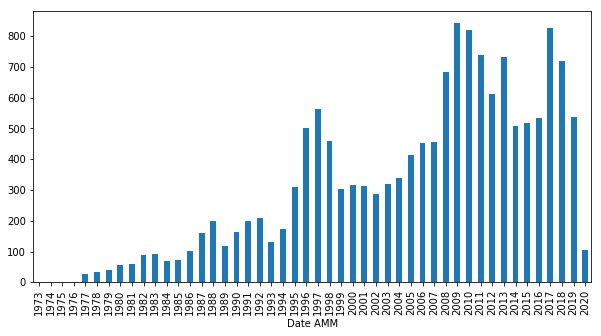

In [16]:
med_by_year = df_spe.groupby(df_spe['Date AMM'].map(lambda x: x.year)).count()['Dénomination']
med_by_year.plot(kind='bar', figsize=(10, 5));

<img src='./oc2.png' width=15px /> Affichez la répartition des statuts administratifs.

In [17]:
df_spe['Statut Administratif'].value_counts()

Autorisation active       14211
Autorisation abrogée        782
Autorisation archivée       193
Autorisation suspendue        9
Autorisation retirée          8
Name: Statut Administratif, dtype: int64

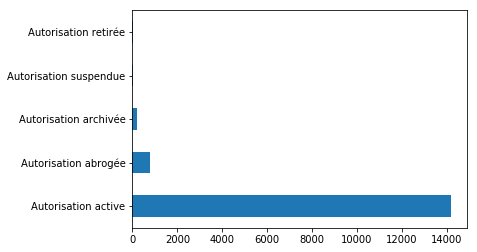

In [18]:
df_spe['Statut Administratif'].value_counts().plot(kind='barh');

### Plus de détails sur le statut des autorisations de mise sur le marché :

L’autorisation de mise sur le marché d’un médicament est dite « **archivée** » notamment dans les situations suivantes :

- le titulaire n’a pas demandé son renouvellement ;
- le médicament n’a jamais été ou n’est plus commercialisé depuis au moins trois ans (sauf exceptions).

Cette situation est généralement liée à des raisons commerciales (et non à des problèmes de santé publique) et est définitive. [source](https://solidarites-sante.gouv.fr/soins-et-maladies/medicaments/glossaire/article/autorisation-d-amm-archivee)

--------
A la demande du titulaire de l’autorisation de mise sur le marché (le plus souvent, un laboratoire pharmaceutique), une AMM peut être supprimée par l’Agence nationale de sécurité du médicament et des produits de santé (ANSM). Elle est dans ce cas dite « **abrogée** ». Cette décision est généralement motivée par le titulaire pour des raisons commerciales (et non liées à des problèmes de santé publique) et est définitive. [source](https://solidarites-sante.gouv.fr/soins-et-maladies/medicaments/glossaire/article/autorisation-d-amm-abrogee)

-----------
Le retrait d’une autorisation de mise sur le marché d’un médicament est une décision prise par la Commission européenne ou l’ANSM afin de faire cesser définitivement la distribution d’un médicament. Elle est dans ce cas dite « **retirée** ». Cette décision est prise pour des raisons de santé publique, notamment lorsqu’il apparaît que l’évaluation du bénéfice du médicament au regard des risques liés à sa qualité, à sa sécurité ou à son efficacité n’est pas considérée comme favorable. La décision de retrait d’autorisation est définitive. [source](https://solidarites-sante.gouv.fr/soins-et-maladies/medicaments/glossaire/article/autorisation-d-amm-retiree)

-----------
La suspension d’une autorisation de mise sur le marché est une mesure temporaire, le plus souvent urgente, prise par la Commission européenne ou l’ANSM, afin de faire cesser la mise à disposition d’un médicament, dans l’intérêt des patients. La durée de la suspension ne peut excéder 1 an et peut aboutir à son retrait. Elle est dans ce cas dite « **suspendue** ».

En savoir plus : la décision de suspension d’AMM intervient notamment lorsqu’il apparaît que le médicament est nocif dans les conditions normales d’emploi ou que l’effet thérapeutique fait défaut ou que le médicament n’a pas la composition quantitative et qualitative déclarée.

La décision de suspension d’une AMM peut être levée ou l’AMM retirée définitivement, selon les données complémentaires alors disponibles. [source](https://solidarites-sante.gouv.fr/soins-et-maladies/medicaments/glossaire/article/autorisation-d-amm-suspendue)

---------

<img src='./oc2.png' width=15px /> Les médicaments potentiellement dangeureux sont donc dans les catégories suivantes : suspendue et retirée. Quels sont les titulaires des médicaments dont l'autorisation est suspendue ou retirée ? (utiliser la fonction `isin`)

In [19]:
etat_anormal = ['Autorisation suspendue', 'Autorisation retirée']
df_spe[df_spe['Statut Administratif'].isin(etat_anormal)]['Titulaires'].value_counts()

 SANDOZ                                 2
 LES LABORATOIRES SERVIER               2
 PFIZER HOLDING FRANCE                  2
 BAYER HEALTHCARE                       2
 SANOFI AVENTIS FRANCE                  2
 GE HEALTHCARE                          2
 LABORATOIRES GERDA                     1
 GEDEON RICHTER                         1
 LABORATOIRES IPRAD PHARMA              1
 EG LABO - LABORATOIRES EUROGENERICS    1
 CRINEX                                 1
Name: Titulaires, dtype: int64

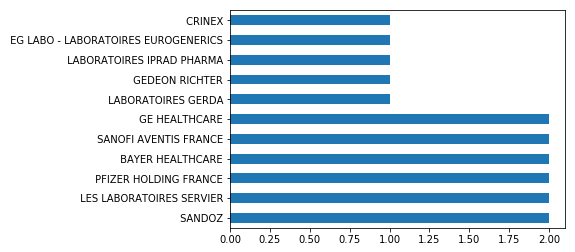

In [20]:
df_spe[df_spe['Statut Administratif'].isin(etat_anormal)]['Titulaires'].value_counts().plot(kind='barh');

<img src='./oc2.png' width=15px /> Affichez la répartition des formes (uniquement pour comprimé, sirop, creme) pour les médicaments suspendus ou retirés.

In [21]:
forme_anormaux = df_spe[df_spe['Statut Administratif'].isin(etat_anormal)][['Forme Pharmaceutique', 'Statut Administratif']]
pd.crosstab(forme_anormaux['Forme Pharmaceutique'], forme_anormaux['Statut Administratif'])

Statut Administratif,Autorisation retirée,Autorisation suspendue
Forme Pharmaceutique,,
comprimé,0,2
comprimé enrobé,2,0
comprimé pelliculé,0,2
crème,1,0
granulés,1,0
pommade,1,0
sirop,1,0
solution buvable,1,0
solution injectable,0,4


<img src='./oc2.png' width=15px /> Quels sont les 10 titulaires disposant du plus grand nombre de médicaments dont l'autorisation est active.

In [22]:
top10_tit = df_spe[df_spe['Statut Administratif'] == 'Autorisation active']['Titulaires'].value_counts()[:10]
top10_tit

 MYLAN SAS                              858
 ARROW GENERIQUES                       691
 BIOGARAN                               666
 EG LABO - LABORATOIRES EUROGENERICS    574
 BOIRON                                 564
 SANDOZ                                 560
 TEVA SANTE                             536
 ZENTIVA FRANCE                         430
 SANOFI AVENTIS FRANCE                  388
 LEHNING                                357
Name: Titulaires, dtype: int64

<img src='./oc2.png' width=15px /> On aimerait maintenant avoir une vue d'ensemble sur les statuts administratifs pour les plus grands fabricants. Affichez la répartition des statuts administratifs pour tous les médicaments des titulaires du top10.

In [23]:
med_top10 = df_spe[df_spe['Titulaires'].isin(top10_tit.index)]
pd.crosstab(med_top10['Titulaires'], med_top10['Statut Administratif'])

Statut Administratif,Autorisation abrogée,Autorisation active,Autorisation archivée,Autorisation retirée,Autorisation suspendue
Titulaires,,,,,
ARROW GENERIQUES,38,691,16,0,0
BIOGARAN,0,666,19,0,0
BOIRON,0,564,4,0,0
EG LABO - LABORATOIRES EUROGENERICS,30,574,0,0,1
LEHNING,4,357,0,0,0
MYLAN SAS,44,858,5,0,0
SANDOZ,17,560,2,0,2
SANOFI AVENTIS FRANCE,25,388,3,2,0
TEVA SANTE,113,536,6,0,0


<img src='./oc2.png' width=15px /> Implémentez une fonction permettant de rechercher des médicaments par un mot clé présent dans la dénomination.

In [24]:
def find_med(df_spe, keyword):
    sentence_list = df_spe['Dénomination'].str.lower()
    sentence_list = sentence_list.str.replace(',', '')
    return df_spe[sentence_list.str.contains('paracetamol')]

<img src='./oc2.png' width=15px /> Utilisez la fonction pour chercher du paracetamol.

In [25]:
find_med(df_spe, 'paracetamol')

,Code CIS,Dénomination,Forme Pharmaceutique,Voies Administration,Statut Administratif,Type Procédure,Etat Commercialisation,Date AMM,Statut Bdm,Numéro Autorisation,Titulaires,Surveillance
3390,60475749,CLARIX ETAT GRIPPAL PARACETAMOL CHLORPHENAMINE...,poudre pour solution buvable,orale,Autorisation active,Procédure nationale,Non commercialisée,2014-03-30,Warning disponibilité,Inconnu,COOPER,Non
3599,61293112,"COQUELUSEDAL PARACETAMOL 100 mg, suppositoire",suppositoire,rectale,Autorisation active,Procédure nationale,Commercialisée,2006-12-04,Inconnu,Inconnu,ELERTE,Non
3600,63208057,"COQUELUSEDAL PARACETAMOL 250 mg, suppositoire",suppositoire,rectale,Autorisation active,Procédure nationale,Commercialisée,2009-07-15,Inconnu,Inconnu,ELERTE,Non
3601,64380679,"COQUELUSEDAL PARACETAMOL 500 mg, suppositoire",suppositoire,rectale,Autorisation active,Procédure nationale,Commercialisée,1995-12-12,Inconnu,Inconnu,ELERTE,Non
4324,69742445,DOLI ETAT GRIPPAL PARACETAMOL/VITAMINE C/PHENI...,poudre pour solution buvable,orale,Autorisation active,Procédure nationale,Non commercialisée,2014-02-05,Warning disponibilité,Inconnu,SANOFI AVENTIS FRANCE,Non
...,...,...,...,...,...,...,...,...,...,...,...,...
13976,69925400,"TRAMADOL/PARACETAMOL SANDOZ 37,5 mg/325 mg, co...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,2012-04-20,Inconnu,Inconnu,LABORATOIRES GRUNENTHAL,Non
13977,68322100,"TRAMADOL/PARACETAMOL TEVA 37.5 mg/325 mg, comp...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,2013-02-15,Inconnu,Inconnu,TEVA SANTE,Non
13978,61227411,"TRAMADOL/PARACETAMOL VENIPHARM 37,5 mg/325 mg,...",comprimé pelliculé,orale,Autorisation abrogée,Procédure nationale,Non commercialisée,2012-12-11,Warning disponibilité,Inconnu,VENIPHARM,Non
13979,63561242,"TRAMADOL/PARACETAMOL ZENTIVA 37,5 mg/325 mg, c...",comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,Commercialisée,2012-04-20,Inconnu,Inconnu,LABORATOIRES GRUNENTHAL,Non


-----------

## Partie 2 - Analyse des prix (40 minutes)
### 1 - Chargement des données

<img src='./oc2.png' width=15px /> Téléchargez le fichier des présentations `CIS_CIP_bdpm.txt` disponible [ici](http://base-donnees-publique.medicaments.gouv.fr/telechargement.php?fichier=CIS_CIP_bdpm.txt) puis chargez le à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df_pres`.

Comme indiqué dans [la documentation des données](http://base-donnees-publique.medicaments.gouv.fr/docs/Contenu_et_format_des_fichiers_telechargeables_dans_la_BDM_v1.pdf), les colonnes du fichier sont uniquement séparées par des tabulations.

**Petit coup de pouce pour démarrer**, pour chacune des conditions suivantes, trouvez le paramètre de la fonction `read_csv` adapté :
- les colonnes sont séparées par des tabulations
- il n'y a pas de header (ligne contenant le nom des colonnes)
- l'encodage à utiliser est *iso-8859-1*

In [26]:
df_pres = pd.read_csv('data/CIS_CIP_bdpm.txt', sep='\t', header=None, encoding='iso-8859-1')

In [27]:
df_pres.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,60002283,4949729,plaquette(s) PVC PVDC aluminium de 30 comprimé(s),Présentation active,Déclaration de commercialisation,16/03/2011,3400949497294,oui,100%,"30,52","31,54","1,02",NaN
1,60002283,4949770,plaquette(s) PVC PVDC aluminium de 90 comprimé(s),Présentation active,Déclaration de commercialisation,19/09/2011,3400949497706,oui,100%,"86,20","87,22","1,02",NaN
2,60002504,3320863,tube(s) polypropylène de 30 comprimé(s),Présentation active,Déclaration de commercialisation,03/12/2003,3400933208639,oui,15%,"7,20","8,22","1,02",NaN
3,60003620,3696350,20 récipient(s) unidose(s) polyéthylène de 2 m...,Présentation active,Déclaration de commercialisation,30/11/2006,3400936963504,oui,65%,"27,60","28,62","1,02",Ce médicament peut être pris en charge ou remb...
4,60004277,3614582,plaquette(s) thermoformée(s) PVC aluminium de ...,Présentation active,Déclaration de commercialisation,11/06/2003,3400936145825,oui,65%,"1,54","2,56","1,02",NaN


<img src='./oc2.png' width=15px /> Remplacez le nom des colonnes par le descriptif suivant :

In [28]:
col_names = ['Code CIS',
             'Code CIP7',
             'Libellé',
             'Statut Administratif',
             'Etat Commercialisation',
             'Date Commercialisation',
             'Code CIP13',
             'Agrément',
             'Taux de Remboursement',
             'Prix hors honoraire',
             'Prix honoraire compris',
             'Honoraire de dispensation',
             'Texte Remboursement']

In [29]:
df_pres.columns = col_names

<img src='./oc2.png' width=15px /> Supprimez les colonnes suivantes ['Code CIP7', 'Code CIP13', 'Prix honoraire compris', 'Honoraire de dispensation']. On décide de supprimer la partie honoraire de dispensation car elle ne concerne pas le fabricant, mais la distribution par la pharmacie. [source](https://sante-pratique-paris.fr/a-savoir/comprendre-les-honoraires-de-dispensation-des-pharmaciens/)

In [30]:
df_pres = df_pres.drop(['Code CIP7', 'Code CIP13', 'Honoraire de dispensation', 'Prix honoraire compris'], axis=1)

### 2 - Le dataframe

<img src='./oc2.png' width=15px /> Combien de lignes et colonnes sont contenues dans `df_pres` ?

In [31]:
df_pres.shape

(20489, 9)

<img src='./oc2.png' width=15px /> Maintenant il serait utile d'avoir quelques **info**rmations sur le type de chacune des colonnes.

In [32]:
df_pres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code CIS                20489 non-null  int64 
 1   Libellé                 20489 non-null  object
 2   Statut Administratif    20489 non-null  object
 3   Etat Commercialisation  20489 non-null  object
 4   Date Commercialisation  20489 non-null  object
 5   Agrément                20489 non-null  object
 6   Taux de Remboursement   12920 non-null  object
 7   Prix hors honoraire     12920 non-null  object
 8   Texte Remboursement     951 non-null    object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB


<img src='./oc2.png' width=15px /> La colonne Date Commercialisation qui est une date, n'est pas bien typée, corrigez cela en utilisant un type `datetime64`.

In [33]:
df_pres['Date Commercialisation'] = pd.to_datetime(df_pres['Date Commercialisation'], format='%d/%m/%Y')

**Il y a encore 2 colonnes dont le type est incorrect, cependant avant de le corriger nous allons supprimer les valeurs manquantes.**

### 3 - Qualité des données

<img src='./oc2.png' width=15px /> Quel est le pourcentage de valeurs manquantes par colonne ?

In [34]:
df_pres.isna().mean(axis=0)

Code CIS                  0.000000
Libellé                   0.000000
Statut Administratif      0.000000
Etat Commercialisation    0.000000
Date Commercialisation    0.000000
Agrément                  0.000000
Taux de Remboursement     0.369418
Prix hors honoraire       0.369418
Texte Remboursement       0.953585
dtype: float64

<img src='./oc2.png' width=15px /> Supprimez les lignes dont le prix est manquant.

In [35]:
df_pres = df_pres.dropna(subset=['Prix hors honoraire'])

<img src='./oc2.png' width=15px /> Supprimez la colonne Texte Remboursement qui contient trop de valeurs manquantes.

In [36]:
df_pres = df_pres.drop(['Texte Remboursement'], axis=1)

<img src='./oc2.png' width=15px /> Nous allons maintenant pouvoir corriger le type des colonnes `Prix hors honoraire` et `Taux de Remboursement`. Afin de ne pas passer trop de temps sur cette correction, le code est déjà implémenté pour vous !

In [37]:
# conversion d'un string en float
# remplace la dernière virgule par un point
# supprime les virgules restantes
# enfin conversion de la colonne en float
def str_to_float(col):
    col = col.astype('str')
    col = col.apply(lambda x: x[::-1])
    col = col.str.replace(',', '.', n=1)
    col = col.apply(lambda x: x[::-1])
    col = col.str.replace(',', '')
    return pd.to_numeric(col)

# application de la fonction sur la colonne
df_pres['Prix hors honoraire'] = str_to_float(df_pres['Prix hors honoraire'])
# supprime le caractère pourcentage, cast en float, puis division par 100
df_pres['Taux de Remboursement'] = pd.to_numeric(df_pres['Taux de Remboursement'].str.replace('%', '')) / 100

<img src='./oc2.png' width=15px /> Ordonnez les lignes du dataframe en fonction de la date de commercialisation.

In [38]:
df_pres = df_pres.sort_values('Date Commercialisation', ascending=False)

<img src='./oc2.png' width=15px /> Existe-t-il des duplicatas ? si oui, supprimez les.

In [39]:
df_dupl = df_pres[df_pres.duplicated(subset=['Code CIS', 'Libellé'])]
df_dupl

,Code CIS,Libellé,Statut Administratif,Etat Commercialisation,Date Commercialisation,Agrément,Taux de Remboursement,Prix hors honoraire
17239,68362319,plaquette(s) formée(s) à froid aluminium de 28...,Présentation active,Déclaration d'arrêt de commercialisation,2017-11-14,non,0.65,17.51
166,60083132,plaquette(s) formée(s) à froid aluminium de 28...,Présentation active,Déclaration de commercialisation,2011-11-03,oui,0.65,11.41
18722,69141416,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,Présentation active,Déclaration de commercialisation,2010-11-16,oui,0.30,8.02


In [40]:
df_pres = df_pres.drop(df_dupl.index, axis=0)

### 4 - Analyse des prix

<img src='./oc2.png' width=15px /> Il est tant de valoriser les informations de la base des spécialisations `df_spe` avec le fichier des présentations. Pour cela réaliser une jointure avec le dataframe `df_pres`, on souhaite récupérer la dénomination, la forme pharmaceutique et le titulaire.

In [41]:
df_pres_spe = df_pres.merge(df_spe[['Code CIS', 'Dénomination', 'Forme Pharmaceutique', 'Titulaires']], on='Code CIS')

<img src='./oc2.png' width=15px /> Quels sont les 5 médicaments commercialisés les plus chers ?

In [42]:
df_pres_comm = df_pres_spe[df_pres_spe['Etat Commercialisation'] == 'Déclaration de commercialisation']
df_pres_comm = df_pres_comm.sort_values('Prix hors honoraire', ascending=False)
df_pres_comm.iloc[:5]

,Code CIS,Libellé,Statut Administratif,Etat Commercialisation,Date Commercialisation,Agrément,Taux de Remboursement,Prix hors honoraire,Dénomination,Forme Pharmaceutique,Titulaires
3038,69258437,"12 flacon(s) en verre de 0,8 ml",Présentation active,Déclaration de commercialisation,2018-01-18,oui,0.65,53140.9,"STRENSIQ 100 mg/ml, solution injectable",solution injectable,ALEXION EUROPE
3036,64450234,12 flacon(s) en verre de 1 ml,Présentation active,Déclaration de commercialisation,2018-01-18,oui,0.65,26642.2,"STRENSIQ 40 mg/ml, solution injectable",solution injectable,ALEXION EUROPE
1943,69565055,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2019-01-17,oui,0.65,20620.8,"LOJUXTA 20 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE)
1984,69243759,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2018-12-18,oui,0.65,20620.8,"LOJUXTA 10 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE)
1985,69851117,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2018-12-18,oui,0.65,20620.8,"LOJUXTA 5 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE)


<img src='./oc2.png' width=15px /> On aimerait maintenant effectuer une vérification dans la base en ligne du médicament, afin d'en savoir plus sur le médicament le plus cher. **Voici le [lien](http://base-donnees-publique.medicaments.gouv.fr/index.php#result) vers la base en ligne.**

In [43]:
df_pres_comm.iloc[:5][['Dénomination', 'Prix hors honoraire', 'Titulaires']]

,Dénomination,Prix hors honoraire,Titulaires
3038,"STRENSIQ 100 mg/ml, solution injectable",53140.9,ALEXION EUROPE
3036,"STRENSIQ 40 mg/ml, solution injectable",26642.2,ALEXION EUROPE
1943,"LOJUXTA 20 mg, gélule",20620.8,AMRYT PHARMACEUTICALS (IRLANDE)
1984,"LOJUXTA 10 mg, gélule",20620.8,AMRYT PHARMACEUTICALS (IRLANDE)
1985,"LOJUXTA 5 mg, gélule",20620.8,AMRYT PHARMACEUTICALS (IRLANDE)


<img src='./oc2.png' width=15px /> Quels sont les 5 médicaments qui après remboursement restent les plus chers ? dans un premier temps, créez une nouvelle colonne indiquant le prix après remboursement, puis classez le dataframe en fonction de cette dernière.

In [44]:
df_pres_comm['Prix après remboursement'] = df_pres_comm['Prix hors honoraire'] * df_pres_comm['Taux de Remboursement']
df_pres_comm.sort_values('Prix après remboursement', ascending=False).iloc[:5]

,Code CIS,Libellé,Statut Administratif,Etat Commercialisation,Date Commercialisation,Agrément,Taux de Remboursement,Prix hors honoraire,Dénomination,Forme Pharmaceutique,Titulaires,Prix après remboursement
3038,69258437,"12 flacon(s) en verre de 0,8 ml",Présentation active,Déclaration de commercialisation,2018-01-18,oui,0.65,53140.9,"STRENSIQ 100 mg/ml, solution injectable",solution injectable,ALEXION EUROPE,34541.585
3036,64450234,12 flacon(s) en verre de 1 ml,Présentation active,Déclaration de commercialisation,2018-01-18,oui,0.65,26642.2,"STRENSIQ 40 mg/ml, solution injectable",solution injectable,ALEXION EUROPE,17317.430
1943,69565055,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2019-01-17,oui,0.65,20620.8,"LOJUXTA 20 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE),13403.520
1984,69243759,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2018-12-18,oui,0.65,20620.8,"LOJUXTA 10 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE),13403.520
1985,69851117,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration de commercialisation,2018-12-18,oui,0.65,20620.8,"LOJUXTA 5 mg, gélule",gélule,AMRYT PHARMACEUTICALS (IRLANDE),13403.520


<img src='./oc2.png' width=15px /> Quels sont les titulaires dont le prix moyen du médicament (en statuf actif) est le plus élevé ?

In [45]:
df_pres_comm.groupby('Titulaires').mean()['Prix hors honoraire'].sort_values(ascending=False)

Titulaires
 ALEXION EUROPE                       27635.925
 AMRYT PHARMACEUTICALS (IRLANDE)      20620.800
 NOUVEAU DEMANDEUR                    16081.400
 VERTEX PHARMACEUTICALS (IRELAND)     13456.100
 ALIMERA SCIENCES EUROPE (IRLANDE)     6035.800
                                        ...    
 UPSA                                     1.462
 CILFA DEVELOPPEMENT                      1.420
 BOIRON                                   1.380
 BRIDOUX                                  1.200
 PHARMASTRA                               1.060
Name: Prix hors honoraire, Length: 346, dtype: float64

<img src='./oc2.png' width=15px /> Quels sont les titulaires dont le taux de remboursement moyen est le plus bas ?

In [46]:
df_pres_comm.groupby('Titulaires').mean()['Taux de Remboursement'].sort_values(ascending=False)

Titulaires
 UAB SICOR BIOTECH (LITUANIE)         1.00
 LEADIANT (ALLEMAGNE)                 1.00
 ASTELLAS PHARMA EUROPE (PAYS-BAS)    1.00
 CHUGAI PHARMA FRANCE                 1.00
 CINFA BIOTECH (ESPAGNE)              1.00
                                      ... 
 CILFA DEVELOPPEMENT                  0.15
 BRIDOUX                              0.15
 GIFRER BARBEZAT                      0.15
 BENE - ARZNEIMITTEL (ALLEMAGNE)      0.15
 BOIRON                               0.15
Name: Taux de Remboursement, Length: 346, dtype: float64

## Bonus

<img src='./oc2.png' width=15px /> On souhaite maintenant comparer les prix du paracetamol sous forme de comprimé pelliculé, dont l'autorisation de mise sur le marché est active et actuellement commercialisé.
Il existe 18 médicaments de ce type, trouvez les !

In [47]:
df_paracetamol = find_med(df_pres_spe, 'paracetamol')
df_paracetamol = df_paracetamol[df_paracetamol['Statut Administratif'] == 'Présentation active']
df_paracetamol = df_paracetamol[df_paracetamol['Forme Pharmaceutique'] == 'comprimé pelliculé']
df_paracetamol = df_paracetamol[df_paracetamol['Etat Commercialisation'] == 'Déclaration de commercialisation']

# récupération des prix et taux de remboursement
df_paracetamol[['Dénomination', 'Titulaires', 'Prix hors honoraire', 'Taux de Remboursement']]

,Dénomination,Titulaires,Prix hors honoraire,Taux de Remboursement
1308,"PARACETAMOL/CODEINE TEVA 500 mg/30 mg, comprim...",TEVA (PAYS-BAS),1.72,0.65
2101,"TRAMADOL/PARACETAMOL EVOLUGEN PHARMA 37,5 mg/3...",EVOLUPHARM,1.88,0.65
2198,"TRAMADOL/PARACETAMOL BGR 37,5 mg/325 mg, compr...",BIOGARAN,1.88,0.65
2199,"TRAMADOL/PARACETAMOL BGR 37,5 mg/325 mg, compr...",BIOGARAN,1.88,0.65
2261,"TRAMADOL/PARACETAMOL MYLAN GENERIQUES 37,5 mg/...",LABORATOIRES GRUNENTHAL,1.88,0.65
2262,"TRAMADOL/PARACETAMOL MYLAN GENERIQUES 37,5 mg/...",LABORATOIRES GRUNENTHAL,1.88,0.65
4742,"TRAMADOL/PARACETAMOL ARROW LAB 37,5 mg/325 mg,...",ARROW GENERIQUES,1.88,0.65
5484,"TRAMADOL/PARACETAMOL GERDA 37,5 mg/325 mg, com...",LABORATOIRES GERDA,1.88,0.65
5587,"TRAMADOL/PARACETAMOL ZYDUS 37,5 mg/325 mg, com...",ZYDUS FRANCE,1.88,0.65
5886,"TRAMADOL/PARACETAMOL EG LABO 37,5 mg/325 mg, c...",EG LABO - LABORATOIRES EUROGENERICS,1.88,0.65


<img src='./oc2.png' width=15px /> Écrivez une fonction qui pour un mot clé donné et une forme pharmaceutique donnée, retourne le prix moyen (avec honoraire) des médicaments commercialisés et actifs.

In [48]:
def mean_price_by_keyword(df, keyword, forme):
    df_keyword = find_med(df, keyword)
    df_keyword = df_keyword[df_keyword['Statut Administratif'] == 'Présentation active']
    df_keyword = df_keyword[df_keyword['Forme Pharmaceutique'] == forme]
    df_keyword = df_keyword[df_keyword['Etat Commercialisation'] == 'Déclaration de commercialisation']
    return df_keyword['Prix hors honoraire'].mean()

<img src='./oc2.png' width=15px /> Testez cette fonction pour le paracetamol

In [49]:
mean_price_by_keyword(df_pres_spe, 'paracetamol', 'comprimé pelliculé')

1.8711111111111112

### Conclusion

Nous n'avons pas encore mis en avant des faits précis, certains médicaments sont très coûteux, mais nous ne savons pas encore pour quelles raisons (identification des substances actives, rareté de la maladie). Cependant nous avons appris à nettoyer un jeu de données composé de plusieurs fichiers, afficher quelques informations importantes, mettre en place quelques fonctions pour extraire des données rapidement. 

C'est donc la fin d'une première phase d'analyse orientée dans l'exploration.

**Les éléments mis en avant sont très subjectifs et ne peuvent pas permettre d'évaluer correctement de la qualité d'un médicament ou d'un fabricant. Pour établir un indicateur qualitatif, il faudrait dans un premier temps approfondir la recherche documentaire afin de lister les variables réflétant les bons ou mauvais comportements.**

### Pour aller plus loin

D'autres fichiers sont encore disponibles, par exemple le fichier des compositions, des avis rendus pour les autorités gouvernementales. On pourrait par exemple utiliser des méthodes d'analyse de texte afin de déterminer si certains avis sont positifs ou négatifs, calculer un score global par rapport à la présence de certaines substances actives.